#Emotion detection from smiley face dataset

#PART 1

####PREPROCESSING

In [ ]:
# Importing required packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [ ]:
# Loading Dataset
# org_x = np.load("/content/drive/MyDrive/Colab Notebooks/HW F21DL resit 2023/smiley_dataset/smiley_X.npy")
# org_y = np.load('/content/drive/MyDrive/Colab Notebooks/HW F21DL resit 2023/smiley_dataset/smiley_Y.npy')
org_x = np.load("/content/drive/MyDrive/Colab Notebooks/HW F21DL resit 2023/smiley_dataset/smiley_noisy_X.npy")
org_y = np.load('/content/drive/MyDrive/Colab Notebooks/HW F21DL resit 2023/smiley_dataset/smiley_noisy_Y.npy')

Checking for null values

In [ ]:
np.sum(np.isnan(org_x) == True) # Checking for Null/Empty values

0

Analysing the structure of data

In [ ]:
print("Len of data y =",len(org_y))
print(type(org_y))
print(org_y.shape)

Len of data y = 204
<class 'numpy.ndarray'>
(204,)


In [ ]:
print(type(org_x))
print(org_x.shape)

<class 'numpy.ndarray'>
(204, 9, 9, 1)


In [ ]:
org_x[0,0]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

As from the structure of the data, we can see that we have 204 images in which each has 9x9x1 shape.

coverting all images to 9x9 pixels

In [ ]:
x_flat= org_x.reshape(204,9,9)

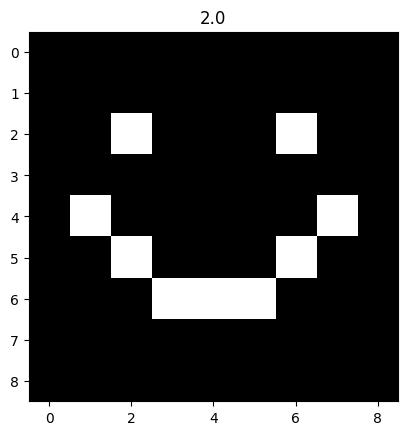

In [ ]:
plt.imshow(x_flat[0] ,cmap="gray")
plt.title(str(org_y[0]))
plt.show()

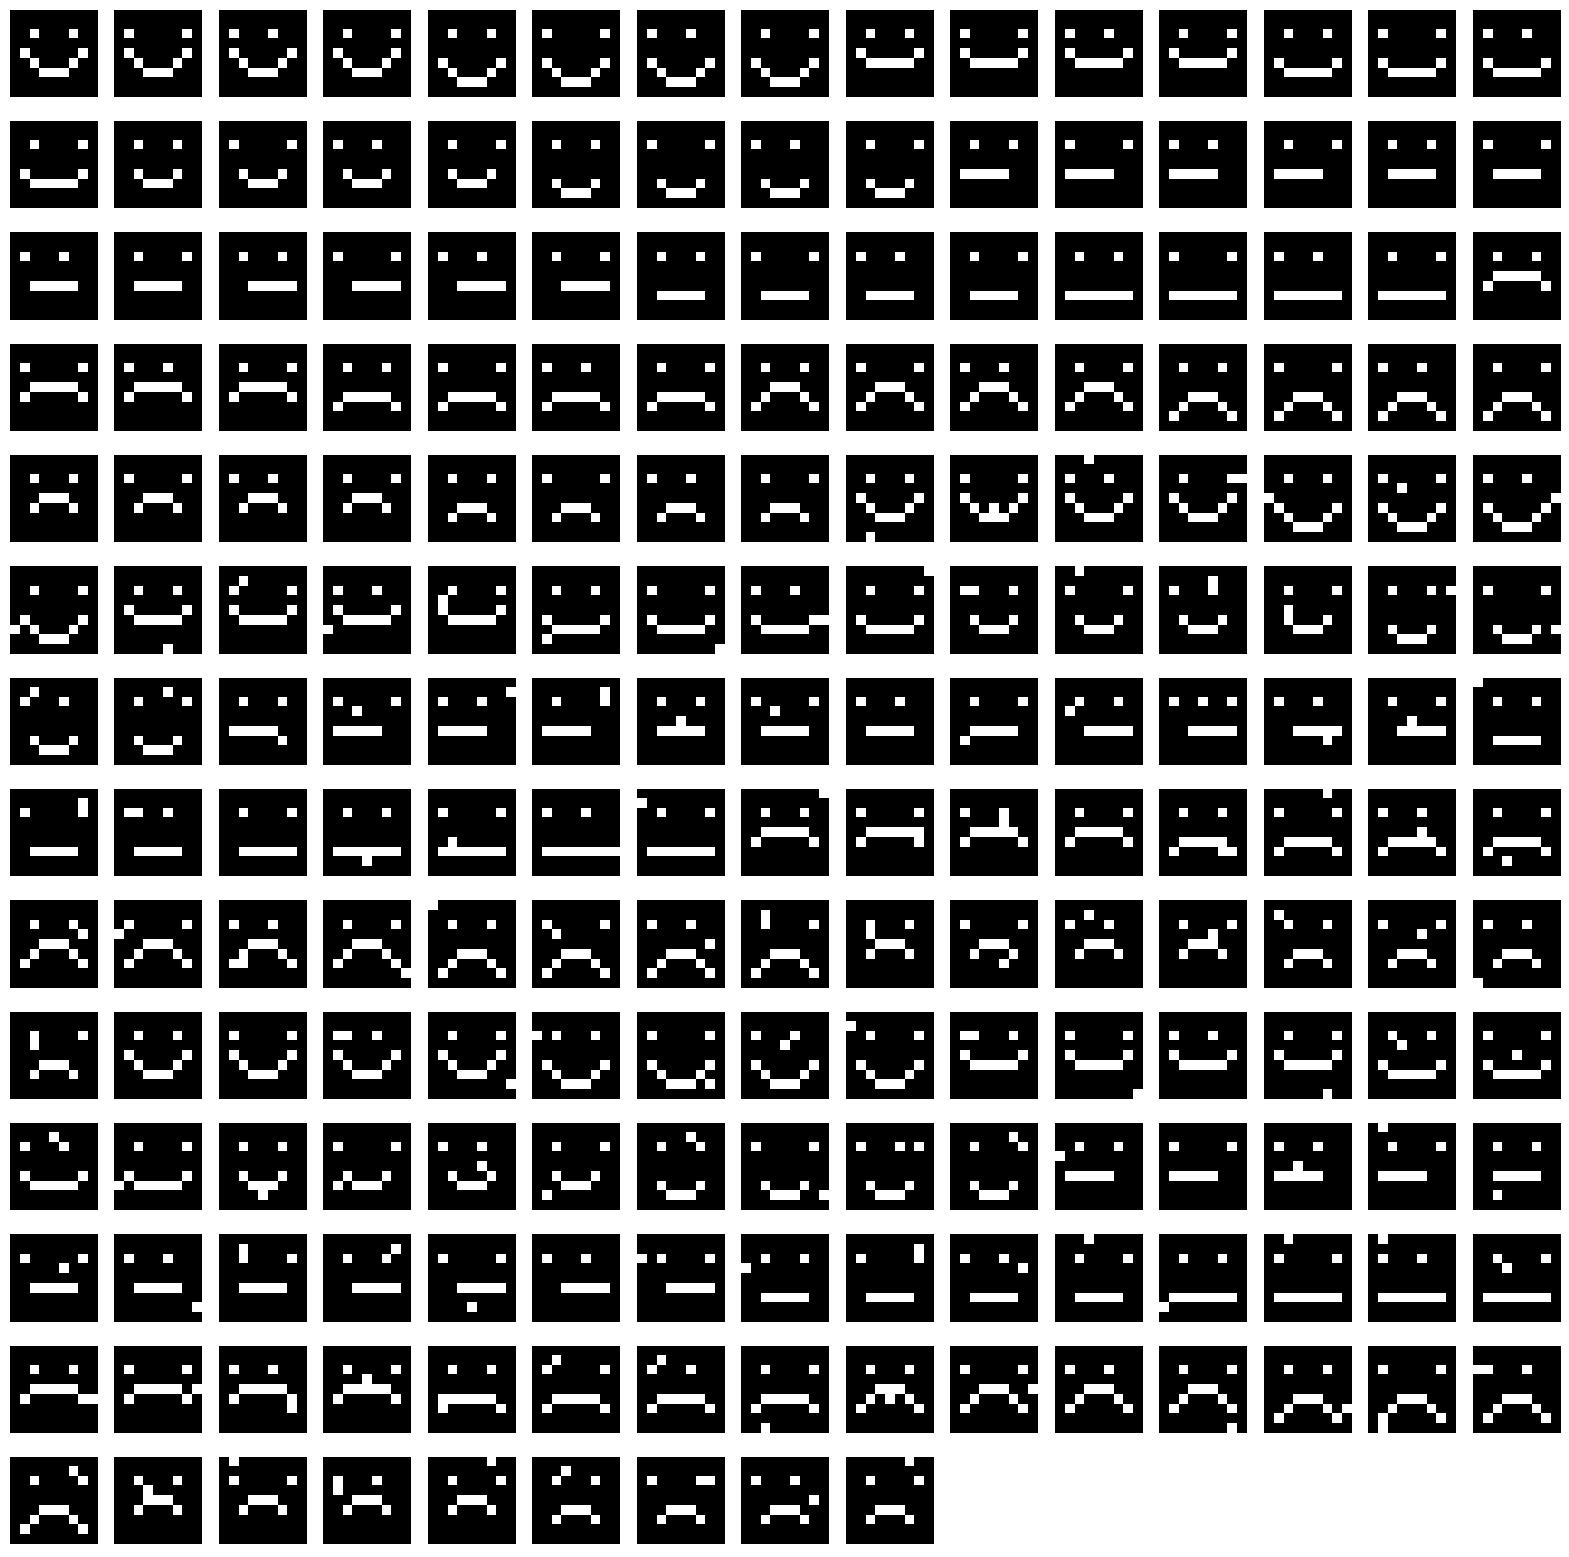

In [ ]:
fig, ax = plt.subplots(14,15,figsize=(20,20))

count = 0
for i in range(14):
    for j in range(15):
      if count < 204:
        ax[i,j].imshow(x_flat[count], cmap = 'gray')
        title = str(org_y[count])
        ax[i,j].axis("off")
        count = count + 1
      else:
        ax[i,j].axis("off")

In [ ]:
np.unique(org_y)

array([0., 1., 2.])

Therefore we have 3 different labels in our output dataset

In [ ]:
for i in np.unique(org_y):
  print("Number of {}'s = {}".format(i,np.sum(org_y == i)))

Number of 0.0's = 72
Number of 1.0's = 60
Number of 2.0's = 72


From the results we cound understand we have a reliable & balanced number of samples in each categories of data

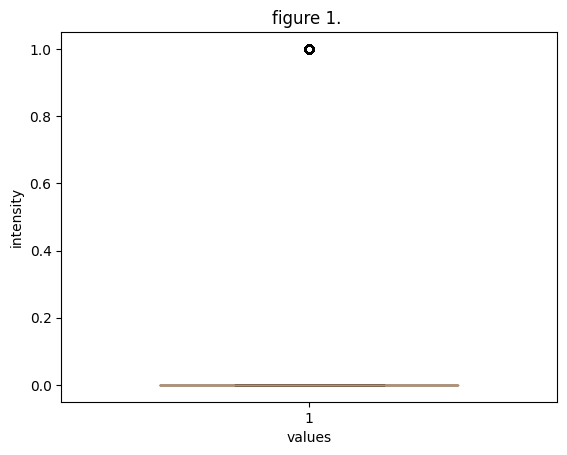

In [ ]:
x_flatten = org_x.flatten()
plt.boxplot(x_flatten,widths = 0.6)
plt.xlabel("values")
plt.ylabel("intensity")
plt.title("figure 1. ")

plt.show()

Here the figure shows that our dataset only has 0's & 1's as data points. which takes us to conclusion that there are no outliers and we have grayscale image dataset. where 0's are black color pixel and 1's are the white color pixel

In [ ]:
np.unique(x_flatten)

array([0., 1.])

As we can see the figure 1 and the results of np.unique() we can confirm that there is no other values than 0's & 1's, therefore no outliers found.

In [ ]:
x_rs = x_flat.reshape(204, -1)

In [ ]:
x_rs.shape

(204, 81)

Here we have 204 rows (images) each with 81 columns (pixels)

### Converting into dataframe

In [ ]:
df = pd.DataFrame(data = x_rs, columns = ['pixel '+str(i+1) for i in range(x_rs.shape[1])])

In [ ]:
df['label'] = org_y[:]

In [ ]:
df

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,...,pixel 73,pixel 74,pixel 75,pixel 76,pixel 77,pixel 78,pixel 79,pixel 80,pixel 81,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


By analysing the provided data, we haven't perfored much of preprocessing here because we haven't found any null values, outliers.

## 1.NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['label'],test_size=0.25,random_state=0)

x_train, x_test = x_train.astype('float')/255, x_test.astype('float')/255  # Normalizing pixel values

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(x_train,y_train)
y_pred = naive_bayes_model.predict(x_test)
print("Naive Bayes Accuracy : {}".format(accuracy_score(y_test,y_pred)))

Naive Bayes Accuracy : 0.7843137254901961


The Accuracy of our naive bayes model can said to be around 78%, which means our model performs reasonably well on the given dataset

In [ ]:
conf_matrix = confusion_matrix(y_test,y_pred)

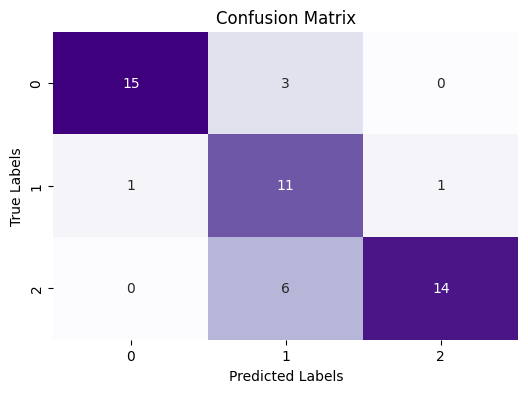

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

from the confusion matrix we can understand that

**Class 0 (Sad)** : 15 correct predictions, 3 instances misclassified as Class 1, and 0 instances misclassified as Class 2

**Class 1 (Neutral)** : 11 correct predictions, 1 instances misclassified as Class 0, and 1 instance misclassified as Class 2

**Class 2 (Happy)** : 14 correct predictions, 6 instances misclassified as Class 1, and 0 instances misclassified as Class 0.

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88        18
         1.0       0.55      0.85      0.67        13
         2.0       0.93      0.70      0.80        20

    accuracy                           0.78        51
   macro avg       0.81      0.79      0.78        51
weighted avg       0.84      0.78      0.80        51



From the classification Report we can understand that our classifier performs better for the class 0 and class 2 compared to class 1. This conclusion has been made considering the higher precision, recall, and f1-score for Class 0 and Class 2

The weighted avg of f1 score is 80% which helps us to conclude that our model has good overall performance across all classes

In [ ]:
y_pred = naive_bayes_model.predict_proba(x_test)
print("ROC AUC score:", roc_auc_score(y_test, y_pred, multi_class='ovr'))

ROC AUC score: 0.9037812388831065


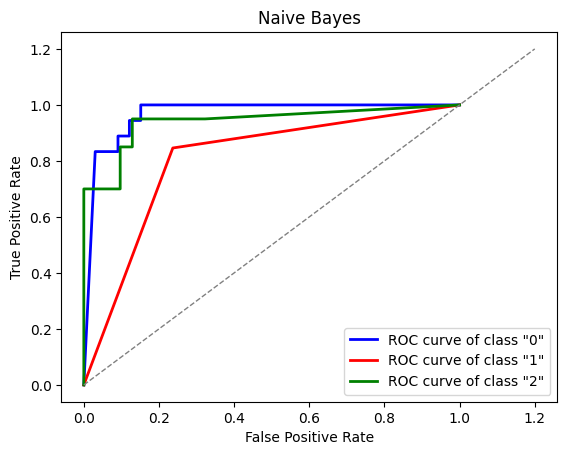

In [ ]:
from itertools import cycle

n_classes = len(naive_bayes_model.classes_)
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    y_test_binary = (y_test == naive_bayes_model.classes_[i]).astype(int)
    y_score = naive_bayes_model.predict_proba(x_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# for each class plotting ROC Curve
plt.figure()
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class "%d"' % i)

plt.plot([0, 1.2], [0, 1.2], color='gray', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.title('Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As the AUC score resulted in 0.9037 which is > .5, indicates that our Naive Bayes classfier model performs well for all the 3 classes in our dataset

In [ ]:
imp_feature =  naive_bayes_model.theta_ # getting mean of each feature per class
print(imp_feature.shape)
imp_feature_mean = imp_feature.mean(axis=0)
print(imp_feature_mean.shape)

(3, 81)
(81,)


In [ ]:
top10_ind = imp_feature_mean.argsort()[-10:][::-1]
top10_features = df.columns[top10_ind]

The 2 datasets with top 6 features and 3 features

In [ ]:
top6 = df[top10_features[:6].append(pd.Index(['label']))]
top3 = df[top10_features[:3].append(pd.Index(['label']))]

Top 6 Features

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(top6.iloc[:,:-1],top6['label'],test_size=0.25,random_state=0)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(x_train,y_train)
y_pred = naive_bayes_model.predict(x_test)
print("Accuracy score : ", accuracy_score(y_test,y_pred))

Accuracy score :  0.37254901960784315


In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.27      0.22      0.24        18
         1.0       0.11      0.08      0.09        13
         2.0       0.52      0.70      0.60        20

    accuracy                           0.37        51
   macro avg       0.30      0.33      0.31        51
weighted avg       0.33      0.37      0.34        51



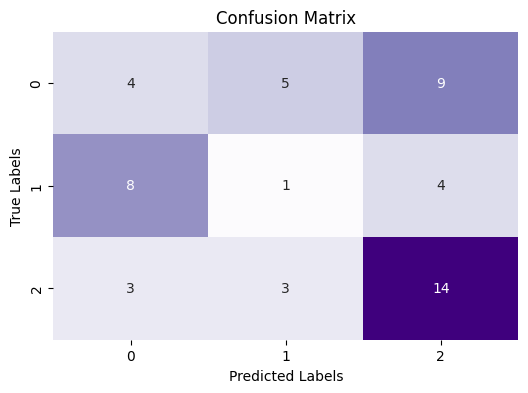

In [ ]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

####Comments:
1. With only these six features, the model fails to perform well, as seen by the poor accuracy of 37.25%.
2. From the confusion Matrix, we can see that the classifier misclassified most of the samples, especially for Class 1 and Class 2. Class 2 has a higher number of true positives but still contains 6 misclassifications.
3. Given that the accuracy and recall, the model appears to be poorly effective in predicting the Classes 0 & 1. and also there could more 50% chance of misclassification for class 2.

Top 3 Features

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(top3.iloc[:,:-1],top3['label'],test_size=0.25,random_state=0)

naive_bayes_model = GaussianNB()

naive_bayes_model.fit(x_train,y_train)
y_pred = naive_bayes_model.predict(x_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.17647058823529413


In [ ]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.21      0.17      0.19        18
         1.0       0.09      0.15      0.11        13
         2.0       0.29      0.20      0.24        20

    accuracy                           0.18        51
   macro avg       0.20      0.17      0.18        51
weighted avg       0.21      0.18      0.19        51



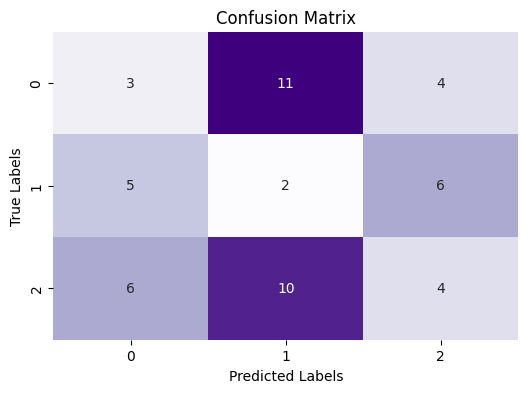

In [ ]:
import seaborn as sns

conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Comments:
1. Similar to the previous result, with the top 3 columns, the model's performance and Accuracy is even lower when compared to the results of top 6 features
2. Like before, the classifier misclassified most of the samples.
3. The classification report reveals that the precision, recall, and f1-score for Class 1 are Very low, indicating that the model did not perform very well on class 1.
4. Comparing the results of top 6 and top 3 feature results, The top 6 feature results seems more efficient compared to top 3 features result


###Conclusion:
The Naive Bayes classifier using only the top 3 & 6 columns of the dataset shows poor performance in terms of accuracy and other evaluation metrics compared to the model with all features. The top 6 & 3 feature model's low precision and recall in several classes indicate the selected features may not be sufficient to discriminate between the classes effectively. However, When comparing top 6 and top 3 features, Top 6 features model found to be performing well because of the size of data.



#Part 2

###Clustering

####Hard Clustering
Here for Hard Clustering I'll be using
###2. k-Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA # Principal component analysis

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [ ]:
noc = 3   # number of clusters
n_clusters=noc

In [ ]:
kmeans = KMeans(n_clusters=noc,n_init=20)
kfit = kmeans.fit(x)
c_labels = kfit.labels_
k_ari = adjusted_rand_score(y,c_labels)
print("{} Clusters\n- --------".format(n_clusters))
print("Adjusted rand score = {}".format(k_ari))

3 Clusters
- --------
Adjusted rand score = 0.31288134543314644


Visualization

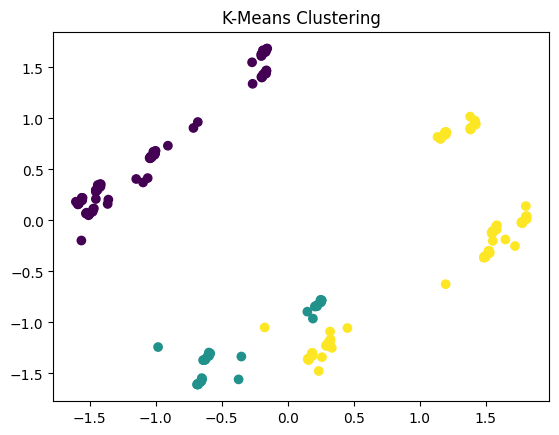

In [ ]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=c_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.show()

In [ ]:
for i in range (3,20):
  n_clusters=i
  kmeans = KMeans(n_clusters=i,n_init=20)
  kfit = kmeans.fit(x)
  c_labels = kfit.labels_
  k_ari = adjusted_rand_score(y,c_labels)
  print("{} Clusters\n- --------".format(n_clusters))
  print("Adjusted rand score = {}".format(k_ari))

3 Clusters
- --------
Adjusted rand score = 0.31288134543314644
4 Clusters
- --------
Adjusted rand score = 0.24362172925633863
5 Clusters
- --------
Adjusted rand score = 0.2515795409090252
6 Clusters
- --------
Adjusted rand score = 0.3130655805478571
7 Clusters
- --------
Adjusted rand score = 0.26920712968653965
8 Clusters
- --------
Adjusted rand score = 0.25474060630936235
9 Clusters
- --------
Adjusted rand score = 0.23948938531982794
10 Clusters
- --------
Adjusted rand score = 0.23576404888482355
11 Clusters
- --------
Adjusted rand score = 0.23394543612784968
12 Clusters
- --------
Adjusted rand score = 0.18722514852112032
13 Clusters
- --------
Adjusted rand score = 0.16088673407948545
14 Clusters
- --------
Adjusted rand score = 0.23958741507939588
15 Clusters
- --------
Adjusted rand score = 0.24445457145377228
16 Clusters
- --------
Adjusted rand score = 0.1706100074981112
17 Clusters
- --------
Adjusted rand score = 0.16908786547503626
18 Clusters
- --------
Adjusted ran

According to the outcomes, clustering the data into six clusters appears to be the best option for our dataset because it produces the highest adjusted rand score. However this might be caused as a result of overfitting.


####Soft Clustering
for soft clustering I'll be using Gaussian Mixture Model (GMM)
###3. GMM

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
noc = 3
gmm = GaussianMixture(n_components = noc)
gmm.fit(x)
c_probs = gmm.predict_proba(x)    #Cluster probabilities
gmm_ari = adjusted_rand_score(y, c_probs.argmax(axis=1))
print("Gaussian Mixture adjusted rand score = {}".format(gmm_ari))

Gaussian Mixture adjusted rand score = 0.31288134543314644


Visualization

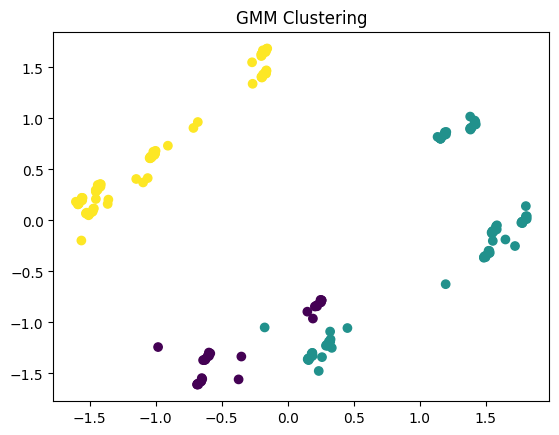

In [ ]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=c_probs.argmax(axis=1), cmap='viridis')
plt.title("GMM Clustering")
plt.show()

In [ ]:
for i in range (3,20):
  noc = i
  gmm = GaussianMixture(n_components = noc)
  gmm.fit(x)
  c_probs = gmm.predict_proba(x)    #Cluster probabilities
  gmm_ari = adjusted_rand_score(y, c_probs.argmax(axis=1))
  print("{} clusters\n-- --------".format(noc))
  print("Gaussian Mixture adjusted rand score = {}".format(gmm_ari))

3 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.31288134543314644
4 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.17924911046964404
5 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.20283323512080143
6 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.2519340419386751
7 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.24580011509191188
8 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.2975624105321614
9 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.2320113877728924
10 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.20878997758284928
11 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.2431319644407051
12 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.24359816081135954
13 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.2067292001597919
14 clusters
-- --------
Gaussian Mixture adjusted rand score = 0.16711399669982818
15 clusters
-- -

the Gaussian Mixture Model with 3 clusters is known to be the highest adjusted rand score for our dataset

However the number of clusters are greater than the number of original number of labels we have in our dataset. This takes us to conclusion that the Kmeans model gave good results at 6 clusters because of the overfitting.

When comparing the Kmeans and GMM adjusted rand score with 3 clusters, GMM has performed well for our dataset compared to the Kmeans.

#PART 3

### 4.Supervised Learning: Decision trees

Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train, x_test = x_train.astype('float')/255, x_test.astype('float')/255

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

# testing accuracy on the training dataset
y_test_pred = dt.predict(x_train)
dt_acc = accuracy_score(y_train,y_test_pred)
print("training set Accuracy : {}".format(dt_acc))

training set Accuracy : 1.0


The model resulted in 100% accuracy on the training dataset

In [ ]:
# 10 fold cross validation
cvs = cross_val_score(dt,x,y,cv =10)

In [ ]:
print("10 fold Cross validation accuracy : {}".format(cvs.mean()))

10 fold Cross validation accuracy : 0.9659523809523808


averaging the accuracy scores of 10 different validation sets, is 97%. This provides us with the information with, the model generalizes well to unseen data.

Without 10-fold

In [ ]:
y_pred = dt.predict(x_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred),"\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
y_pred_proba = dt.predict_proba(x_test)
print("ROC Area:", roc_auc_score(y_test, y_pred_proba, multi_class='ovr'))

Test Set Accuracy: 0.9803921568627451 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         1.0       1.00      0.92      0.96        13
         2.0       1.00      1.00      1.00        20

    accuracy                           0.98        51
   macro avg       0.98      0.97      0.98        51
weighted avg       0.98      0.98      0.98        51

ROC Area: 0.9821289821289821


**98.04**% accuracy on unseen data which is really good results.
The classification report shows high precision, recall, and F1-score values for all class

In [ ]:
confusion_matrix(y_test,y_pred)

array([[18,  0,  0],
       [ 1, 12,  0],
       [ 0,  0, 20]])

The confusion matrix shows that the model made only 1 misclassifications, with most of the predictions being correct.

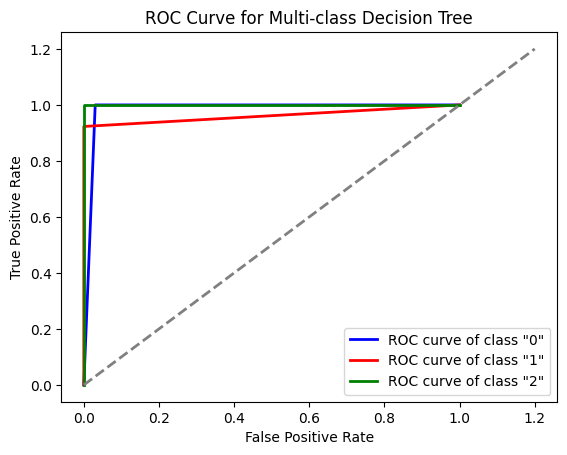

In [ ]:
from itertools import cycle

n_classes = len(dt.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    y_test_binary = (y_test == dt.classes_[i]).astype(int)
    y_score = dt.predict_proba(x_test)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class "%d"' % i)

plt.plot([0, 1.2], [0, 1.2], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Decision Tree')
plt.legend(loc="lower right")
plt.show()

The ROC Area of 0.9821 shows that our model has performed excellent to distinguish between the classes

However the 100% fitting using the training data is maybe a result of overfitting. So it's better to analyse further by adjusting the parameters of our tree model.

####Adjusting the size of the tree

In [ ]:
depth_values = [3, 5, 10, 20, 30, 40]
for depth in depth_values:
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(x_train, y_train)
    y_pred = dt_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Depth = {depth}, Test Accuracy = {test_accuracy:.4f}")

Depth = 3, Test Accuracy = 0.8627
Depth = 5, Test Accuracy = 0.9608
Depth = 10, Test Accuracy = 0.9608
Depth = 20, Test Accuracy = 0.9804
Depth = 30, Test Accuracy = 0.9804
Depth = 40, Test Accuracy = 0.9804


As we increase the death of the tree, the accuracy of our model increases along with it. However, when the depth increased more than 20, the accuracy remains the same as 98.04%.

In comparison to a depth of 5, expanding the tree depth to 10 does not significantly enhance test accuracy. This indicates that our model may started to overfit

####Confidence Threshold for Pruning
Pruning the tree helps prevent overfitting by removing branches with low impurity or nodes with too few samples

In [ ]:
min_impurity_values = [0.0, 0.001, 0.005, 0.01, 0.1]
for min_impurity in min_impurity_values:
    dt_model = DecisionTreeClassifier(min_impurity_decrease=min_impurity)
    dt_model.fit(x_train, y_train)
    y_pred = dt_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Min Impurity Decrease = {min_impurity}, Test Accuracy = {test_accuracy:.4f}")

Min Impurity Decrease = 0.0, Test Accuracy = 0.9804
Min Impurity Decrease = 0.001, Test Accuracy = 0.9804
Min Impurity Decrease = 0.005, Test Accuracy = 0.9608
Min Impurity Decrease = 0.01, Test Accuracy = 0.9608
Min Impurity Decrease = 0.1, Test Accuracy = 0.6863


when the min impurity is 0.0 this allows the tree to have as much as leaves and branches required resulting in the highest accuracy, which here in our case resulted in overfitting.

As we see here the sudden drop of accuracy while min impurity increased to 0.1

####Splitting Criteria (criterion)
to measurethe quality of split

In [ ]:
criterion_values = ['gini', 'entropy']
for criterion in criterion_values:
    dt_model = DecisionTreeClassifier(criterion=criterion)
    dt_model.fit(x_train, y_train)
    print("Cross validation : ",cross_val_score(dt,x_train,y_train,cv =10).mean())
    y_pred = dt_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Criterion = {criterion}, Test Accuracy = {test_accuracy:.4f}\n")

Cross validation :  0.95375
Criterion = gini, Test Accuracy = 0.9804

Cross validation :  0.9670833333333333
Criterion = entropy, Test Accuracy = 0.9804



As we see the test accuracy of switching criterion results in the similar percentage. Eventhough, comparing the cross validation score of each criterion, it is better to choose entropy criterion for our dataset

####Minimum Instances per Leaf (min_samples_leaf)


In [ ]:
min_samples_leaf_values = [1, 5, 7, 10, 20, 50]
for min_samples_leaf in min_samples_leaf_values:
    dt_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt_model.fit(x_train, y_train)
    y_pred = dt_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Min Samples Leaf = {min_samples_leaf}, Test Accuracy = {test_accuracy:.4f}")

Min Samples Leaf = 1, Test Accuracy = 0.9804
Min Samples Leaf = 5, Test Accuracy = 0.9804
Min Samples Leaf = 7, Test Accuracy = 0.9804
Min Samples Leaf = 10, Test Accuracy = 0.8627
Min Samples Leaf = 20, Test Accuracy = 0.8235
Min Samples Leaf = 50, Test Accuracy = 0.4706


Setting certain number of min samples leaf for each node can prevent overfitting problem.

In our case it would be better to set the leaves to 1, 5 or 7  according to the results we got here.

### 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
x_train, x_test = x_train.astype('float')/255, x_test.astype('float')/255

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_acc = accuracy_score(y_test, y_pred)
print("Test dataset accuracy : ",rf_acc)

Test dataset accuracy :  1.0


In [ ]:
print("Classification report : {}".format(classification_report(y_test,y_pred)) )

Classification report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00        20

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [ ]:
y_test_prob = rf.predict_proba(x_test)
print("ROC Area : {}".format(roc_auc_score(y_test, y_test_prob, multi_class='ovr')))

ROC Area : 1.0


Adjusting Depth of the Trees (max_depth)

In [ ]:
depth_values = [None, 3, 5, 10, 20]
for depth in depth_values:
    rf_model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Depth = {depth}, Test Accuracy = {test_accuracy:.4f}")

Depth = None, Test Accuracy = 1.0000
Depth = 3, Test Accuracy = 0.9804
Depth = 5, Test Accuracy = 1.0000
Depth = 10, Test Accuracy = 1.0000
Depth = 20, Test Accuracy = 1.0000


Confidence Threshold for Pruning (min_impurity_decrease or min_samples_split)

In [ ]:
min_impurity_values = [0.0, 0.001, 0.005, 0.01, 0.1]
for min_impurity in min_impurity_values:
    rf_model = RandomForestClassifier(min_impurity_decrease=min_impurity, n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Min Impurity Decrease = {min_impurity}, Test Accuracy = {test_accuracy:.4f}")

Min Impurity Decrease = 0.0, Test Accuracy = 1.0000
Min Impurity Decrease = 0.001, Test Accuracy = 1.0000
Min Impurity Decrease = 0.005, Test Accuracy = 1.0000
Min Impurity Decrease = 0.01, Test Accuracy = 1.0000
Min Impurity Decrease = 0.1, Test Accuracy = 0.7451


Splitting Criteria (criterion)

In [ ]:
criterion_values = ['gini', 'entropy']
for criterion in criterion_values:
    rf_model = RandomForestClassifier(criterion=criterion, n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Criterion = {criterion}, Test Accuracy = {test_accuracy:.4f}")

Criterion = gini, Test Accuracy = 1.0000
Criterion = entropy, Test Accuracy = 1.0000


Minimum Instances per Leaf (min_samples_leaf)

In [ ]:
min_samples_leaf_values = [1, 5, 7, 9, 10, 20, 50]
for min_samples_leaf in min_samples_leaf_values:
    rf_model = RandomForestClassifier(min_samples_leaf=min_samples_leaf, n_estimators=100, random_state=42)
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Min Samples Leaf = {min_samples_leaf}, Test Accuracy = {test_accuracy:.4f}")

Min Samples Leaf = 1, Test Accuracy = 1.0000
Min Samples Leaf = 5, Test Accuracy = 1.0000
Min Samples Leaf = 7, Test Accuracy = 0.9804
Min Samples Leaf = 9, Test Accuracy = 0.8824
Min Samples Leaf = 10, Test Accuracy = 0.9216
Min Samples Leaf = 20, Test Accuracy = 0.4902
Min Samples Leaf = 50, Test Accuracy = 0.3529


The results of the Random forest shows that the data is certainly overfitting

Comparing the results of Decision Tree classifier and Random Forest classifier algorithm, It seems comparatively Random forest overfits the most for our dataset.

#PART 4

###6. Linear Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

x = df.drop('label', axis=1)
y = df['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
x_train, x_test = x_train.astype('float')/255, x_test.astype('float')/255

In [ ]:
# without cross Validation
lr = Logisti2cRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
lr_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression accuracy without cross validation : {}".format(lr_acc))

Logistic Regression accuracy without cross validation : 0.3333333333333333


In [ ]:
# with 10 fold cross validation
print("Accuracy, With 10 fold cross validation : {}".format(cross_val_score(lr,x,y,cv=10).mean()))

Accuracy, With 10 fold cross validation : 0.9949999999999999


From the results, It looks like the Linear regression model results better with 10-fold Cross Validation

###7. Multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

Trying to find which activation function and size of hize layer provides best results for our dataset

In [ ]:
act_func = ['logistic','relu','tanh']
hidden_layer_sizes = [(40,), (20,), (40, 20), (81, 40), (81,40,20), (40,20,10)]
lr = 0.001
epoch = 50
momentum = 0.9
threshold = 0.1
for activation in act_func:
  for hidden_layer in hidden_layer_sizes:
    mlp_model = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer,
                                                      learning_rate_init=lr, max_iter=epoch, momentum=momentum,
                                                      validation_fraction=threshold, random_state=42)
    mlp_model.fit(x_train, y_train)
    train_accuracy = mlp_model.score(x_train, y_train)
    test_accuracy = mlp_model.score(x_test, y_test)
    print(f"\n\nActivation:{activation}, Hidden Layers:{hidden_layer}, Learning Rate:{lr}, Epochs:{epoch}, Momentum:{momentum}, Validation Threshold:{threshold}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")



Activation:logistic, Hidden Layers:(40,), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:logistic, Hidden Layers:(20,), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



Activation:logistic, Hidden Layers:(40, 20), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



Activation:logistic, Hidden Layers:(81, 40), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:logistic, Hidden Layers:(81, 40, 20), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3464, Test Accuracy: 0.3725



Activation:logistic, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



Activation:relu, Hidden Layers:(40,), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3464, Test Accuracy: 0.3725



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(20,), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(81, 40), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3464, Test Accuracy: 0.3725



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(81, 40, 20), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3464, Test Accuracy: 0.3725



Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.5752, Test Accuracy: 0.4706



Activation:tanh, Hidden Layers:(40,), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3660, Test Accuracy: 0.3725



Activation:tanh, Hidden Layers:(20,), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



Activation:tanh, Hidden Layers:(40, 20), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



Activation:tanh, Hidden Layers:(81, 40), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.3595, Test Accuracy: 0.3333



Activation:tanh, Hidden Layers

When it comes to logistic activation function, The model provides the test accuracy of 37.25% with 3 hidden layer with 81 neurons on first and 40 on the second and 20 on the last

In Relu activation, the model resulted in 47.06% test accuracy & 57.5% of train accuarcy with 3 hidden layers of(40, 20, 10)

In tanh activation function, the model resulted in its best accuracy of 37.25% with a single hidden layes with 40 neurons

Hereby, We can see that the MLPclassifier results are improved where the hidden layers are more than one.

And also we can see that both logistic and tanh activation function gave same accuracy of 37.25% at certain point and not improving any further by adjusting the number of hidden layers. However, The relu activation function resulted in 47.06 % accuracy which is comparatively higher compared to the rest.


So it helps us to conclude by choosing **relu** as our activation function and 3 hidden layers for the our model

In [ ]:
hidden_layer = (40,20,10)
activation = 'relu'
mlp_model = MLPClassifier(activation=activation, hidden_layer_sizes= hidden_layer,
                                                      learning_rate_init=0.01, max_iter=50, momentum=momentum,
                                                      validation_fraction=threshold, random_state=42)
mlp_model.fit(x_train, y_train)
train_accuracy = mlp_model.score(x_train, y_train)
test_accuracy = mlp_model.score(x_test, y_test)
print(f"\n\nActivation:{activation}, Hidden Layers:{hidden_layer}, Learning Rate:{lr}, Epochs:{epoch}, Momentum:{momentum}, Validation Threshold:{threshold}")
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")



Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.6601, Test Accuracy: 0.5490



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp_model = MLPClassifier(activation=activation, hidden_layer_sizes= hidden_layer,
                                                      learning_rate_init=0.1, max_iter=50, momentum=0,
                                                      validation_fraction=0.0, random_state=42)
mlp_model.fit(x_train, y_train)
train_accuracy = mlp_model.score(x_train, y_train)
test_accuracy = mlp_model.score(x_test, y_test)
print(f"\n\nActivation:{activation}, Hidden Layers:{hidden_layer}, Learning Rate:{lr}, Epochs:{epoch}, Momentum:{momentum}, Validation Threshold:{threshold}")
print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")



Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


As we can see here, as we increase the Learning rate, the test and train accuracy of our model increased rapidly

In [ ]:
momentums = [0.9, 0.95, 0.99]
validation_thresholds = [0.1, 0.01, 0.001]

Trying to improve our test accuracy by adjusting some parameters (i.e no of iteration , momentum and validation thresholds)

In [ ]:
epoch = 50
for momentum in momentums:
  for threshold in validation_thresholds:
    mlp_model = MLPClassifier(activation=activation, hidden_layer_sizes= hidden_layer,
                                                          learning_rate_init=0.1, max_iter=epoch, momentum=momentum,
                                                          validation_fraction=threshold, random_state=42)
    mlp_model.fit(x_train, y_train)
    train_accuracy = mlp_model.score(x_train, y_train)
    test_accuracy = mlp_model.score(x_test, y_test)
    print(f"\n\nActivation:{activation}, Hidden Layers:{hidden_layer}, Learning Rate:{lr}, Epochs:{epoch}, Momentum:{momentum}, Validation Threshold:{threshold}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.01
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.9, Validation Threshold:0.001
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.95, Validation Threshold:0.1
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.95, Validation Threshold:0.01
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.95, Validation Threshold:0.001
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.99, Validation Threshold:0.1
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.99, Validation Threshold:0.01
Train Accuracy: 0.8039, Test Accuracy: 0.7647



Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:50, Momentum:0.99, Validation Threshold:0.001
Train Accuracy: 0.8039, Test Accuracy: 0.7647



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
epoch = 100
for momentum in momentums:
  for threshold in validation_thresholds:
    mlp_model = MLPClassifier(activation=activation, hidden_layer_sizes= hidden_layer,
                                                          learning_rate_init=0.1, max_iter=epoch, momentum=momentum,
                                                          validation_fraction=threshold, random_state=42)
    mlp_model.fit(x_train, y_train)
    train_accuracy = mlp_model.score(x_train, y_train)
    test_accuracy = mlp_model.score(x_test, y_test)
    print(f"\n\nActivation:{activation}, Hidden Layers:{hidden_layer}, Learning Rate:{lr}, Epochs:{epoch}, Momentum:{momentum}, Validation Threshold:{threshold}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.9, Validation Threshold:0.01
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.9, Validation Threshold:0.001
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.95, Validation Threshold:0.1
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.95, Validation Threshold:0.01
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.95, Validation Threshold:0.001
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.99, Validation Threshold:0.1
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.99, Validation Threshold:0.01
Train Accuracy: 0.9935, Test Accuracy: 0.9608



Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:100, Momentum:0.99, Validation Threshold:0.001
Train Accuracy: 0.9935, Test Accuracy: 0.9608



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
epoch = 150
for momentum in momentums:
  for threshold in validation_thresholds:
    mlp_model = MLPClassifier(activation=activation, hidden_layer_sizes= hidden_layer,
                                                          learning_rate_init=0.1, max_iter=epoch, momentum=momentum,
                                                          validation_fraction=threshold, alpha = 0.0001, random_state=42)
    mlp_model.fit(x_train, y_train)
    train_accuracy = mlp_model.score(x_train, y_train)
    test_accuracy = mlp_model.score(x_test, y_test)
    print(f"\n\nActivation:{activation}, Hidden Layers:{hidden_layer}, Learning Rate:{lr}, Epochs:{epoch}, Momentum:{momentum}, Validation Threshold:{threshold}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.9, Validation Threshold:0.1
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.9, Validation Threshold:0.01
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.9, Validation Threshold:0.001
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.95, Validation Threshold:0.1
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.95, Validation Threshold:0.01
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.95, Validation Threshold:0.001
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.99, Validation Threshold:0.1
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(




Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.99, Validation Threshold:0.01
Train Accuracy: 1.0000, Test Accuracy: 0.9804



Activation:relu, Hidden Layers:(40, 20, 10), Learning Rate:0.001, Epochs:150, Momentum:0.99, Validation Threshold:0.001
Train Accuracy: 1.0000, Test Accuracy: 0.9804



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


#####Conclusion :
As we can see here, as we increase the number of iteration there is a increase in the test accuracy of our dataset, however this stops once the number of iteration passes 150. I have also tried adjusting the  momentum & validation threshold along with the number of iterations, However these changes doesn't seem to affect the test & train accuracy of our model.

### 8. CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
x_train_cnn = x_train.values.reshape(-1, 9, 9, 1)
x_test_cnn = x_test.values.reshape(-1, 9, 9, 1)

# Defining CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(9, kernel_size=(3, 3), activation='relu', input_shape=(9, 9, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(18, activation='relu'))
cnn_model.add(Dense(9, activation='softmax'))

# Compiling the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn_model.fit(x_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.1)

test_accuracy_cnn = cnn_model.evaluate(x_test_cnn, y_test)
print("\nCNN Test Accuracy:", test_accuracy_cnn[1])


Epoch 1/50
5/5 [==============================] - 2s 47ms/step - loss: 2.1580 - accuracy: 0.1679 - val_loss: 2.0977 - val_accuracy: 0.1250
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 2.0561 - accuracy: 0.2482 - val_loss: 2.0079 - val_accuracy: 0.0625
Epoch 3/50
5/5 [==============================] - 0s 37ms/step - loss: 1.9547 - accuracy: 0.3285 - val_loss: 1.9182 - val_accuracy: 0.1875
Epoch 4/50
5/5 [==============================] - 0s 43ms/step - loss: 1.8584 - accuracy: 0.3504 - val_loss: 1.8290 - val_accuracy: 0.2500
Epoch 5/50
5/5 [==============================] - 0s 37ms/step - loss: 1.7655 - accuracy: 0.3650 - val_loss: 1.7391 - val_accuracy: 0.2500
Epoch 6/50
5/5 [==============================] - 0s 49ms/step - loss: 1.6686 - accuracy: 0.3723 - val_loss: 1.6484 - val_accuracy: 0.2500
Epoch 7/50
5/5 [==============================] - 0s 38ms/step - loss: 1.5745 - accuracy: 0.3723 - val_loss: 1.5574 - val_accuracy: 0.2500
Epoch 8/50
5/5 [===========

The validation accuracy improves as the epochs increases, At the end Our CNN model performs with more than 85% accuracy which is seen to be very good performance

Since the test accuracy is high, the model is expected to perform well on the new unseen data.
